<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/PROYECTO_IPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Proyecto 2 Series de tiempo**



Michelle Gómez

Paula Pelayo

Rogelio Campos

Fernando Torres

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)



### **ÍNDICE**

- Introducción
- Teoría Modelo (Neural network autoregression)
- Descarga de datos
- Aplicación de transformación matemática
- Ajuste de modelo
- Validación y análisis de resultados
- Elección de modelo para cada acción, según métrica de error
- Pronósticos a 3 meses / cada industria y portafolio total
- Cierre y conclusiones



## **Introducción**

IPC

El **Índice de Precios y Cotizaciones (IPC)** es el principal indicador bursátil de México, elaborado por la Bolsa Mexicana de Valores (BMV). Mide el rendimiento promedio de una muestra de las acciones más negociadas y de mayor capitalización en el mercado, lo que lo convierte en un barómetro del desempeño del mercado financiero y, en cierta medida, de la economía mexicana.

El IPC es relevante porque sirve como referencia para evaluar la rentabilidad de las inversiones en el mercado accionario, guía a los inversionistas en la toma de decisiones y se utiliza como base para productos financieros como ETFs. También es un indicador de confianza para el mercado, ya que refleja las expectativas de los inversionistas nacionales e internacionales.

Aunque es una herramienta clave, el IPC tiene limitaciones, como su vulnerabilidad a la volatilidad del mercado y la concentración en un pequeño número de empresas que pueden tener un peso significativo en el índice. Aun así, sigue siendo fundamental para analizar y comprender el comportamiento del mercado bursátil en México.
______

## **Teoría del Modelo**



**Redes Neuronales Autoregresivas (NNAR)**

Las Redes Neuronales Autoregresivas (NNAR) combinan los principios de las redes neuronales artificiales con las técnicas autoregresivas tradicionales para modelar y predecir series de tiempo. Son redes útiles para datos temporales complejos, como precios de activos financieros, tasas de interés o indicadores económicos, donde las relaciones no lineales y los patrones estacionales son comunes.

___

**¿Qué es una NNAR?**

Es una red neuronal de tipo feed-forward diseñada con el propósito de trabajar con series de tiempo. En lugar de utilizar predictores externos, utiliza valores pasados de la propia serie (rezagos) para predecir valores futuros.

**Estructura de una NNAR**
  1.	Capa de entrada: Los valores rezagados de la serie {yt−1, yt−2,…, yt−p }, se utilizan como predictores. Por ejemplo, en un modelo NNAR(5,3), se toman los últimos 5 valores de la serie.

  2.	Capa oculta: Esta capa contiene "neuronas" que combinan las entradas mediante pesos asignados a cada predictor. Las combinaciones pasan por una función de activación (como la función sigmoide) que introduce no linealidad en el modelo. Esto permite a la red identificar patrones complejos en los datos.

  3.	Capa de salida: La capa de salida genera el valor predicho de la serie para el próximo período (yt).

  ___

**¿Cómo funciona?**

-*Entrenamiento:*
○	La red ajusta los pesos asignados a cada predictor minimizando una función de pérdida, como el error cuadrático medio (MSE).
○	Este proceso utiliza técnicas como el descenso de gradiente.


-*Predicción:*
○	Una vez entrenada, la red utiliza los valores pasados de la serie para predecir valores futuros.
○	Si se requiere una predicción de varios pasos, las predicciones se alimentan de vuelta como entradas en un proceso iterativo.


**Aplicaciones en ingeniería financiera**
En ingeniería financiera, las NNAR son útiles para:
-	Predecir precios de activos financieros, como acciones o criptomonedas.
-	Modelar tasas de interés o inflación.
-	Estimar la volatilidad de mercados.
Un ejemplo práctico sería utilizar un modelo NNAR para predecir el precio futuro de una acción basándose en los últimos valores de cierre.
___
**Ventajas y limitaciones**

*Ventajas:*
-	Capacidad para modelar patrones no lineales.
-	Incorporación de estacionalidad sin necesidad de transformaciones complejas.
-	Flexibilidad para manejar datos complejos.

*Limitaciones:*
- Requiere ajustar cuidadosamente los hiperparámetros (ppp, kkk, PPP).
-	Mayor costo computacional en comparación con métodos lineales.
-	Dependencia de un buen preprocesamiento de datos y series históricas completas.
___
Las **NNAR** representan una herramienta avanzada y versátil para analizar y predecir series de tiempo en problemas financieros. Su capacidad para capturar patrones no lineales las hace especialmente valiosas en mercados donde las relaciones entre variables son complejas y dinámicas. Con el uso de bibliotecas como TensorFlow, Keras o PyTorch, los alumnos pueden implementar estos modelos para resolver problemas reales de predicción financiera



____
## **Descarga de Datos**


In [11]:
import yfinance as yf
import pandas as pd

In [12]:
tickers = ["AMXB.MX", "WALMEX.MX", "FEMSAUBD.MX", "GMEXICOB.MX", "GFNORTEO.MX",
           "BIMBOA.MX", "TLEVISACPO.MX", "KIMBERA.MX", "CEMEXCPO.MX", "CHDRAUIB.MX",
           "MEGACPO.MX", "LABB.MX", "CUERVO.MX", "GRUMAB.MX", "ALSEA.MX",
           "GFINBURO.MX", "OMAB.MX", "ASURB.MX", "AC.MX", "GCARSOA1.MX",
           "BBAJIOO.MX", "GAPB.MX", "BOLSAA.MX", "PINFRA.MX", "ALFAA.MX",
           "LIVEPOLC-1.MX", "PE&OLES.MX", "KOFUBL.MX", "VESTA.MX", "GCC.MX",
           "ORBIA.MX", "Q.MX", "RA.MX"]

weights = [0.0908, 0.0866, 0.0999, 0.0204, 0.0179, 0.036, 0.0953, 0.0157, 0.0649, 0.0085,
           0.0085, 0.0105, 0.0051, 0.0094, 0.0113, 0.1062, 0.0202, 0.0428, 0.0262, 0.0337,
           0.0155, 0.0159, 0.0049, 0.0112, 0.0129, 0.0091, 0.0097, 0.0217, 0.0164, 0.0185,
           0.0093, 0.0153, 0.0067]

ticker = yf.Tickers(tickers)
data = ticker.history(start='2015-01-01', end='2023-12-31', interval='1mo')['Close']

data = yf.download(tickers, start="2010-01-01", end="2024-07-31", interval='1mo')['Close']
data.head()

[*********************100%***********************]  33 of 33 completed
[*********************100%***********************]  33 of 33 completed


Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00+00:00,42.000000,7.705962,10.100813,13.587643,64.519997,NaN,20.575001,16.510000,8.782896,NaN,...,26.290001,19.610001,27.251942,241.949997,27.50,NaN,NaN,51.330002,NaN,28.915001
2010-02-01 00:00:00+00:00,41.869999,7.877713,11.220961,13.539967,68.370003,NaN,23.309999,18.450001,8.965568,NaN,...,29.700001,20.260000,28.994118,255.830002,28.98,NaN,NaN,47.290001,NaN,31.844999
2010-03-01 00:00:00+00:00,42.619999,8.897257,13.052159,14.874893,65.169998,NaN,27.195000,19.580000,9.308993,NaN,...,32.139999,23.400000,35.816837,260.760010,31.00,NaN,NaN,52.279999,NaN,31.559999
2010-04-01 00:00:00+00:00,46.500000,8.751086,12.945015,14.779541,68.360001,NaN,24.600000,20.650000,10.733839,NaN,...,31.040001,23.290001,34.308247,259.579987,30.65,NaN,NaN,51.230000,NaN,28.660000
2010-05-01 00:00:00+00:00,44.250000,8.353683,12.516436,14.636513,68.300003,NaN,22.972500,19.299999,10.595007,NaN,...,30.820000,21.590000,33.081909,235.720001,27.99,NaN,NaN,49.959999,NaN,28.770000


In [13]:
# portafolio de el índice según el precio de cada acción dentro de este mismo
portafolio = data.dot(weights)
portafolio = portafolio.dropna()


In [14]:
# sector de cada acción
sector_data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        sector = stock.info['sector']
        sector_data[ticker] = sector
    except KeyError:
        sector_data[ticker] = 'Unknown'

sector_data

{'AMXB.MX': 'Communication Services',
 'WALMEX.MX': 'Consumer Defensive',
 'FEMSAUBD.MX': 'Consumer Defensive',
 'GMEXICOB.MX': 'Basic Materials',
 'GFNORTEO.MX': 'Financial Services',
 'BIMBOA.MX': 'Consumer Defensive',
 'TLEVISACPO.MX': 'Communication Services',
 'KIMBERA.MX': 'Consumer Defensive',
 'CEMEXCPO.MX': 'Basic Materials',
 'CHDRAUIB.MX': 'Consumer Defensive',
 'MEGACPO.MX': 'Unknown',
 'LABB.MX': 'Healthcare',
 'CUERVO.MX': 'Consumer Defensive',
 'GRUMAB.MX': 'Consumer Defensive',
 'ALSEA.MX': 'Consumer Cyclical',
 'GFINBURO.MX': 'Financial Services',
 'OMAB.MX': 'Industrials',
 'ASURB.MX': 'Industrials',
 'AC.MX': 'Consumer Defensive',
 'GCARSOA1.MX': 'Industrials',
 'BBAJIOO.MX': 'Financial Services',
 'GAPB.MX': 'Industrials',
 'BOLSAA.MX': 'Financial Services',
 'PINFRA.MX': 'Industrials',
 'ALFAA.MX': 'Basic Materials',
 'LIVEPOLC-1.MX': 'Consumer Cyclical',
 'PE&OLES.MX': 'Basic Materials',
 'KOFUBL.MX': 'Consumer Defensive',
 'VESTA.MX': 'Real Estate',
 'GCC.MX': 'B

In [15]:
# eliminar NaN
data_clean = data.dropna()


In [16]:
# Convertir las fechas a secuencias numéricas (por ejemplo, convertir fechas a ordinales)
data_clean.index = pd.to_datetime(data_clean.index)
data_clean.index = data_clean.index.map(lambda x: x.toordinal())

In [27]:
# Tratamiento de outliers -
def eliminar_atipicos(serie, factor=1.5):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    lim_inferior = q1 - factor * iqr
    lim_superior = q3 + factor * iqr
    return serie.clip(lower=lim_inferior, upper=lim_superior)

data_no_outliers = data_clean.apply(eliminar_atipicos)

# Diferenciación para estacionariedad
def diferenciar(serie):
    return serie.diff().dropna()

data_diferenciada = data_no_outliers.apply(diferenciar)

# Suavización de la serie
def suavizar_serie(serie, window_length=7, polyorder=2):
    return savgol_filter(serie, window_length, polyorder)
data_suavizada = data_diferenciada.apply(suavizar_serie)

# Recorte de la serie a los últimos valores representativos
def recortar_serie(serie, num_valores=100):
    return serie.tail(num_valores)
data_rex = data_suavizada.apply(recortar_serie)

In [23]:
data_no_outliers.head()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
737180,104.750000,16.343765,38.290001,13.072742,309.429993,37.869999,39.549999,35.740002,7.99,33.040001,...,80.910004,118.290001,41.009998,219.309998,190.809998,52.209999,94.919998,36.500000,27.959999,55.310001
737211,103.849998,17.229927,37.779999,13.539967,311.089996,38.389999,40.029999,36.330002,8.09,32.419998,...,81.540001,117.220001,40.290001,248.300003,190.729996,53.889999,98.930000,32.450001,28.330000,52.400002
737241,101.930000,15.165260,39.070000,12.872504,290.950012,36.049999,36.500000,31.959999,6.81,28.879999,...,81.629997,118.010002,35.110001,177.389999,172.619995,59.700001,91.779999,36.330002,28.219999,56.540001
737272,105.010002,15.640316,42.740002,12.672265,294.850006,33.500000,35.070000,36.869999,7.47,28.070000,...,81.820000,117.750000,36.750000,240.619995,167.779999,67.470001,90.790001,35.439999,30.840000,56.730000
737303,106.669998,15.832166,45.880001,13.730670,301.640015,32.630001,35.990002,37.110001,7.69,30.860001,...,79.470001,117.080002,39.099998,262.670013,176.940002,70.889999,90.489998,38.630001,30.309999,58.480000


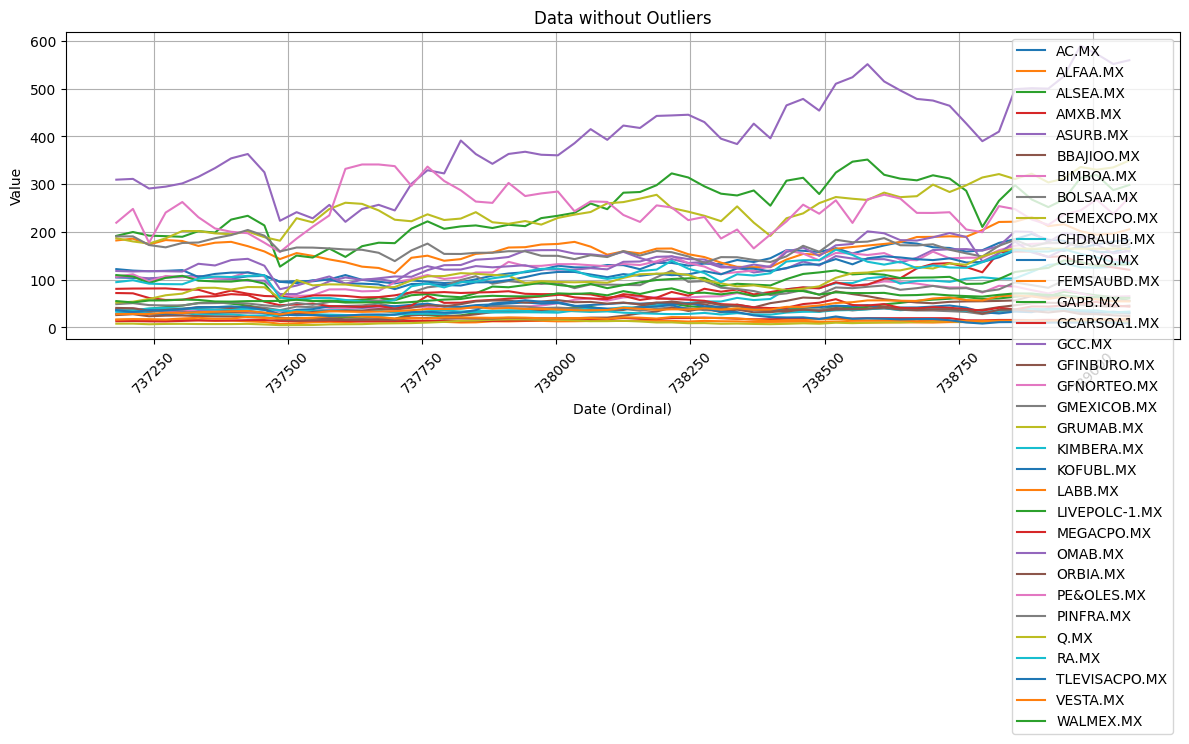

In [35]:
# grafica data_no_outliers

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# ... (Your existing code for data loading and preprocessing) ...

# Assuming 'data_no_outliers' is your DataFrame with outliers removed

# Plotting the data
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for column in data_no_outliers.columns:
    plt.plot(data_no_outliers.index, data_no_outliers[column], label=column)

plt.xlabel("Date (Ordinal)")  # Or adjust the label if your index is not ordinal
plt.ylabel("Value")
plt.title("Data without Outliers")
plt.legend()  # Show legend
plt.grid(True) # Add a grid for better readability
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [36]:
data_suavizada.head()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
737211,-1.245715,0.194025,-1.218810,-0.104206,-7.142375,-0.128571,-0.781904,-1.601667,-0.282143,-1.455478,...,2.461664,-1.221428,-3.217617,4.582621,-7.750479,1.403811,-1.648094,-2.422380,0.284524,-0.588095
737241,0.147143,-0.228393,2.025000,0.152563,-3.826423,-1.347142,-1.107143,0.452142,-0.190714,-1.327143,...,-0.645716,0.050000,-0.687142,5.014288,-5.329285,5.542143,0.040715,0.082143,0.640715,0.402142
737272,0.892858,-0.485497,3.900000,0.319429,0.203576,-1.994285,-1.214285,1.771428,-0.121429,-1.147857,...,-2.486429,1.455714,0.960000,3.729287,-2.733568,7.693571,1.352143,1.789285,0.898572,0.883571
737303,0.991430,-0.577289,4.406191,0.396392,4.947622,-2.070000,-1.103333,2.356190,-0.074286,-0.917619,...,-3.060476,2.995713,1.723809,0.727620,0.036670,7.858094,2.286190,2.699047,1.058095,0.856190
737333,-0.320953,0.017836,3.550952,0.530338,16.270950,-0.961429,0.013810,2.751429,0.062857,0.008095,...,-1.833809,5.485713,1.936190,4.049048,6.483809,4.560952,5.257619,2.173809,1.172382,-1.187619


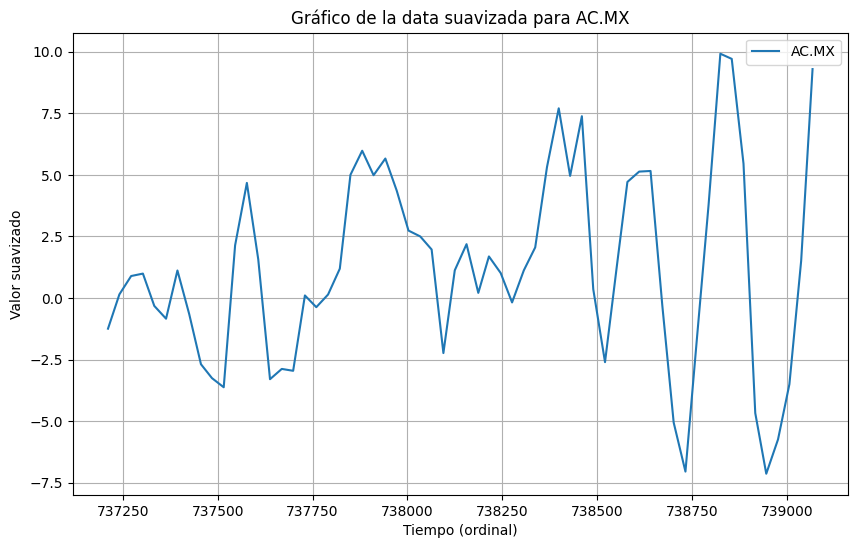

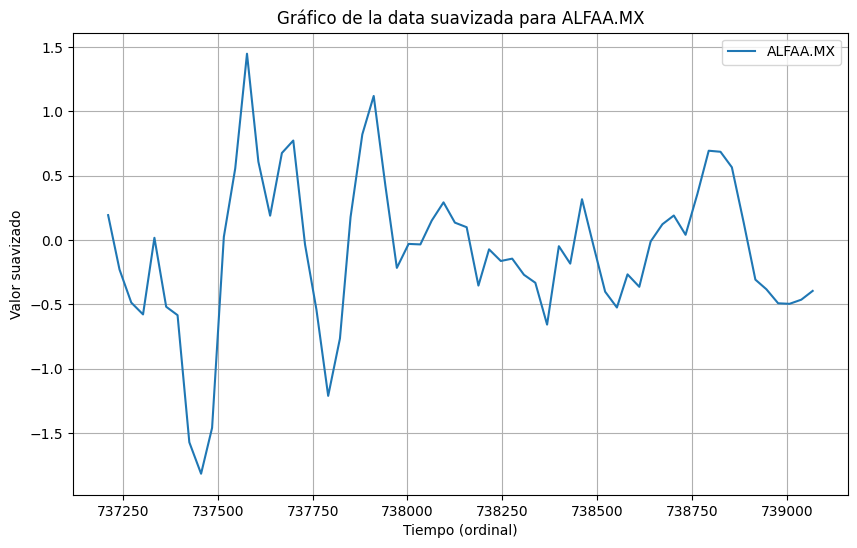

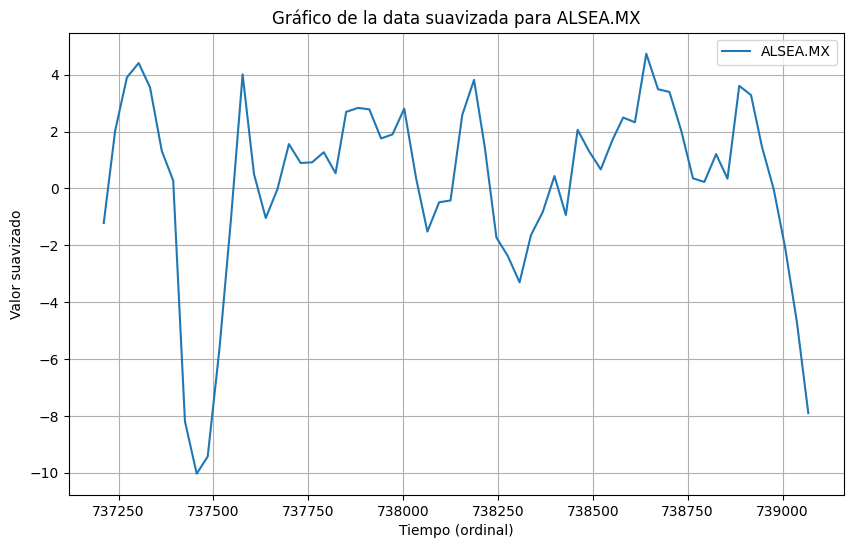

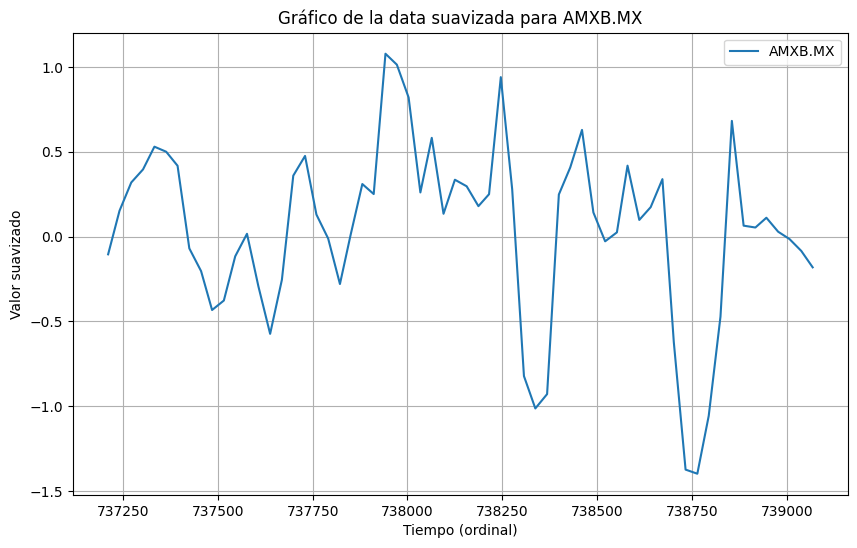

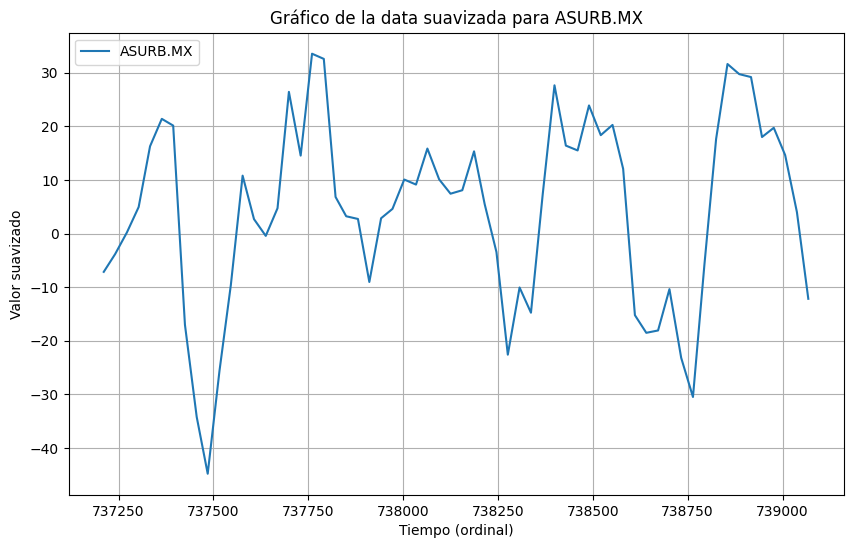

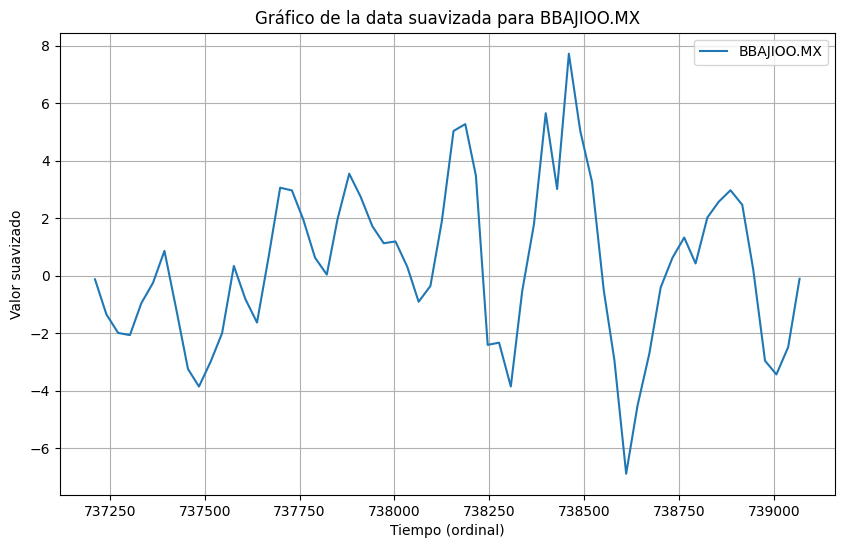

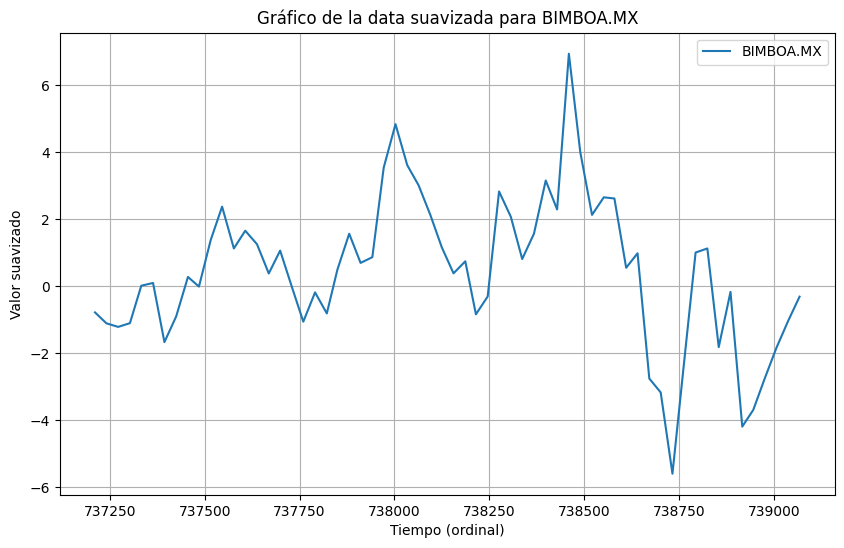

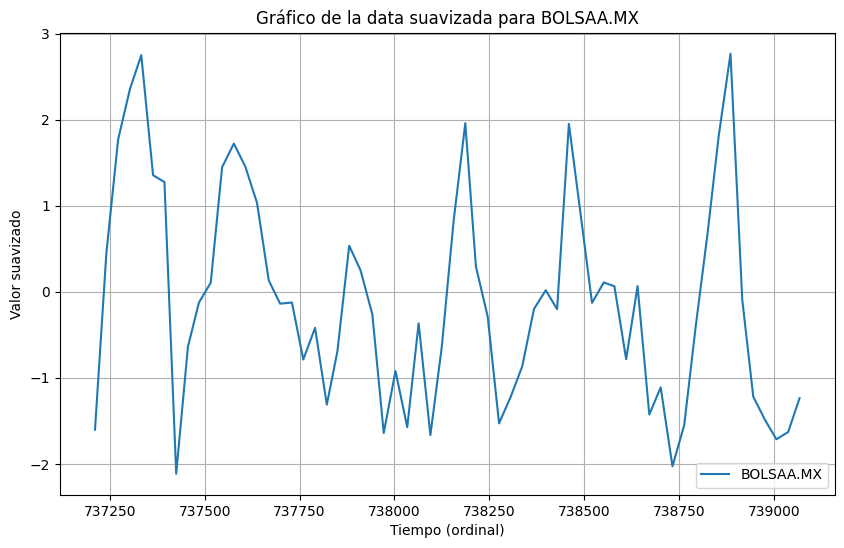

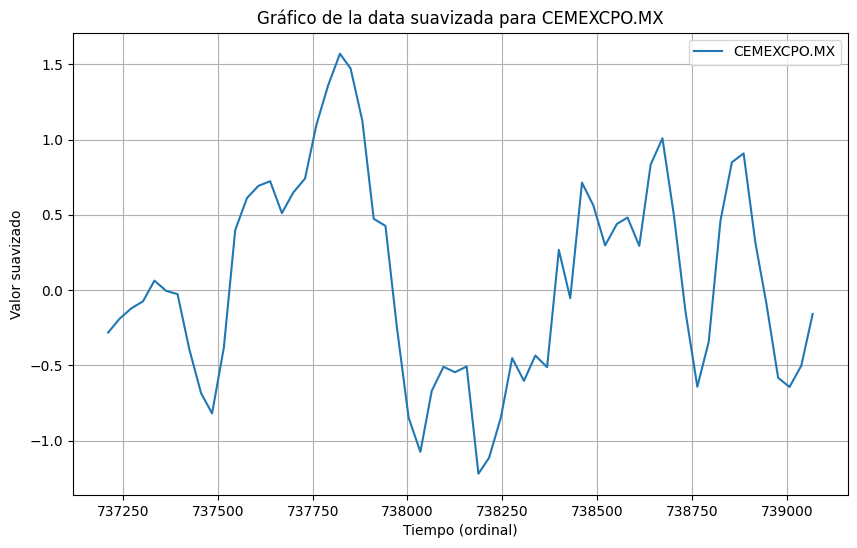

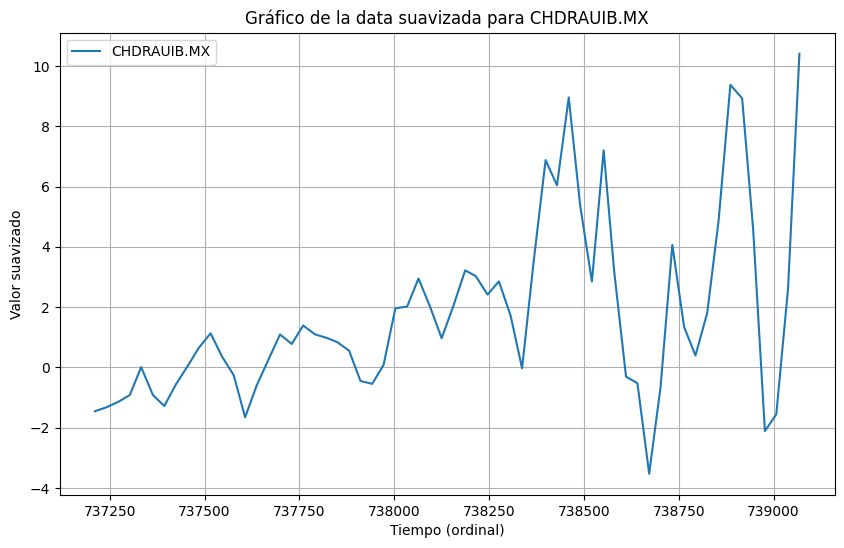

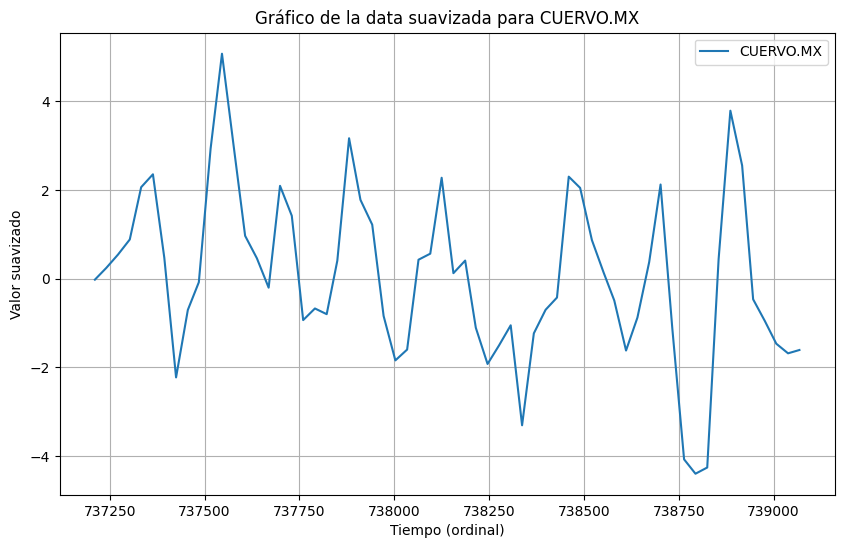

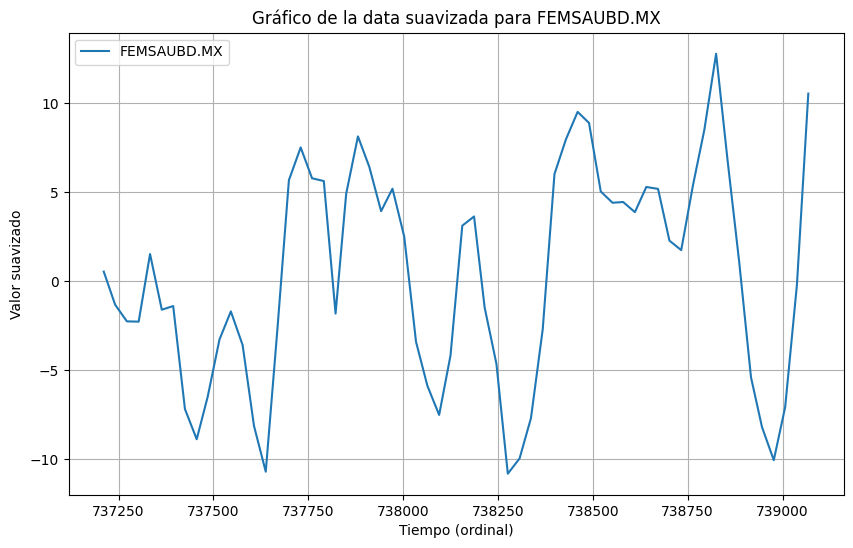

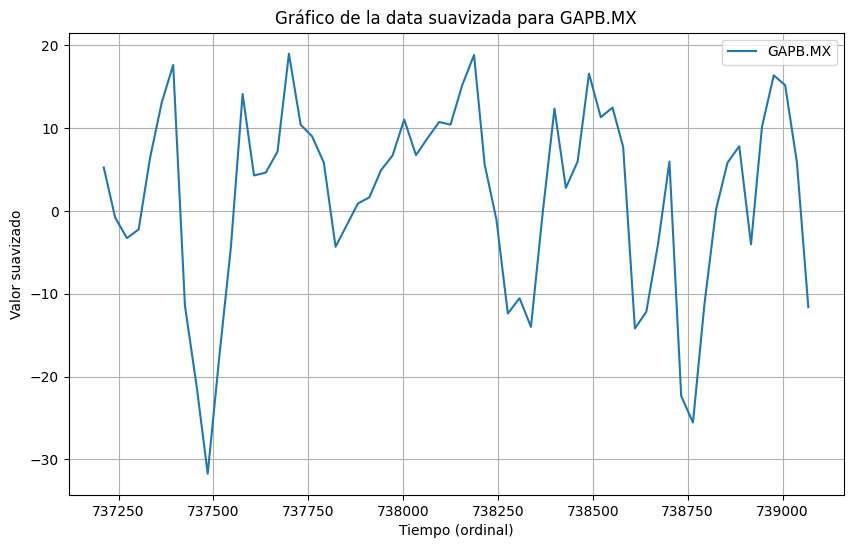

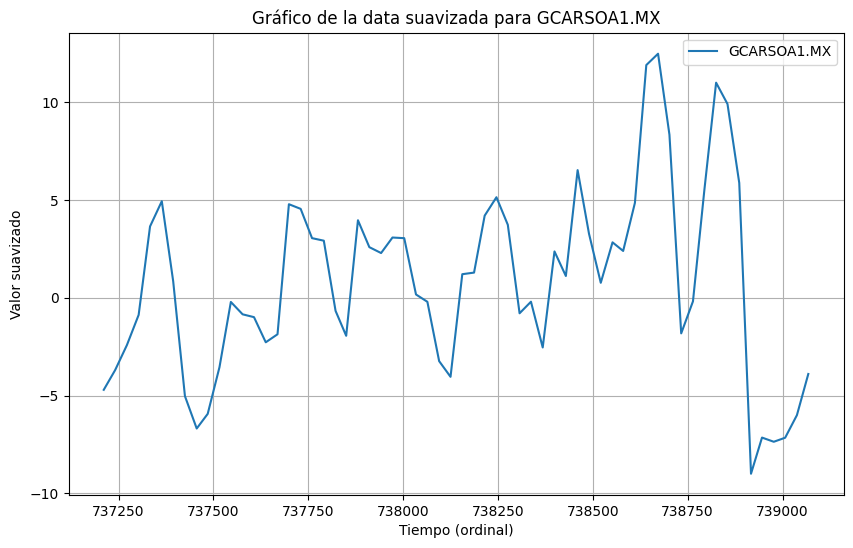

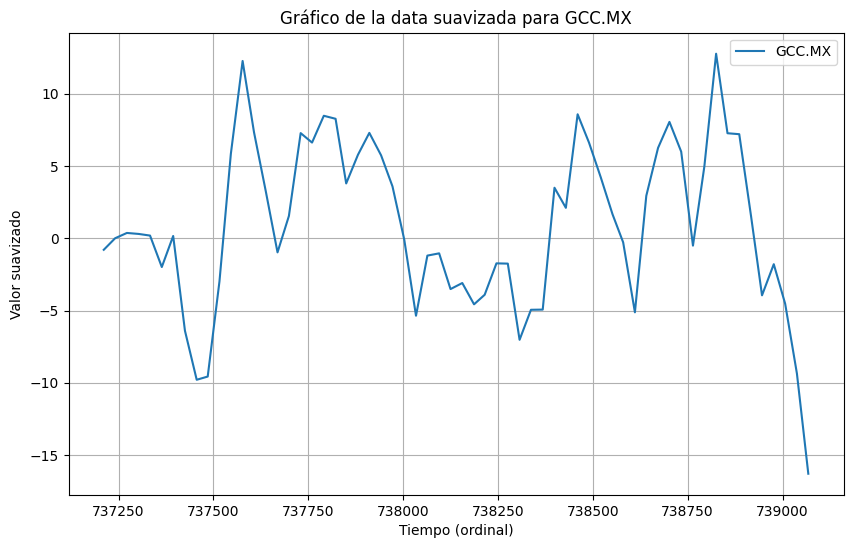

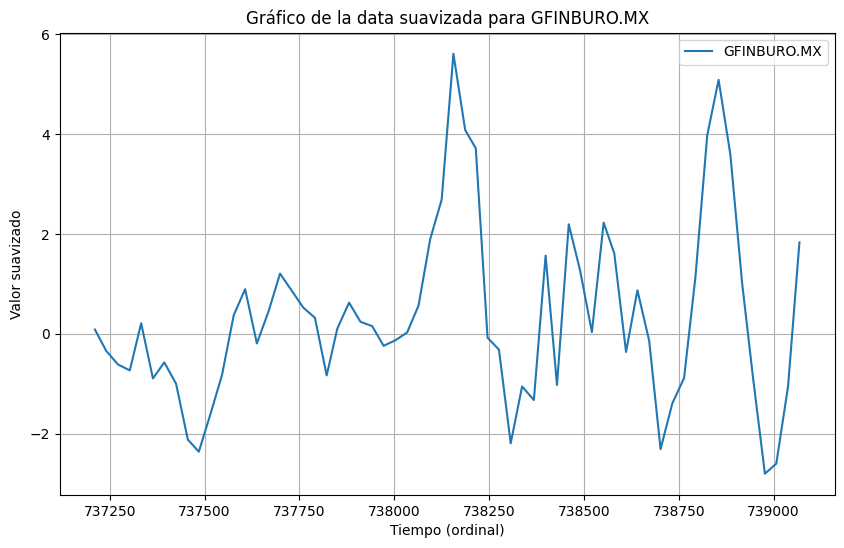

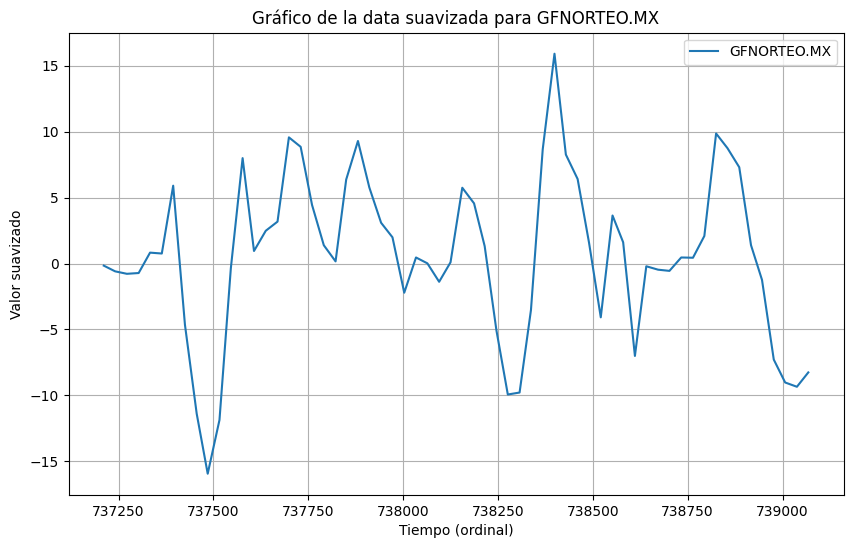

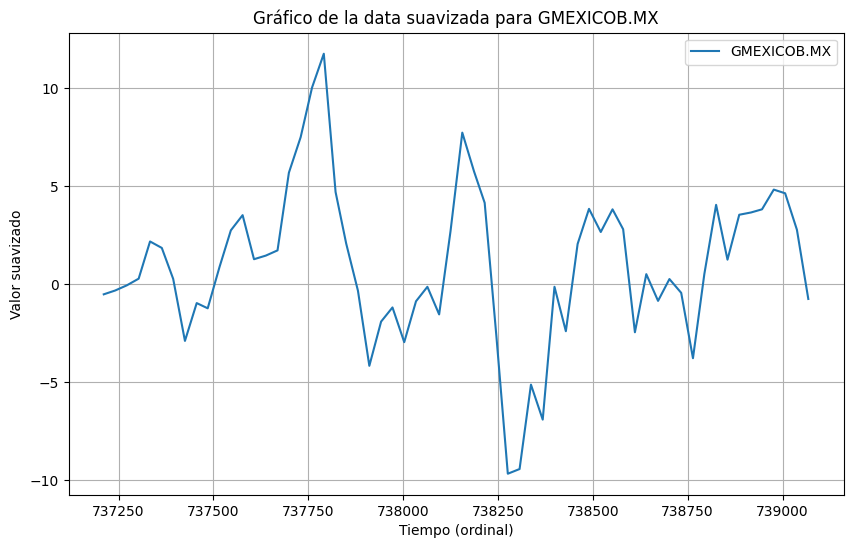

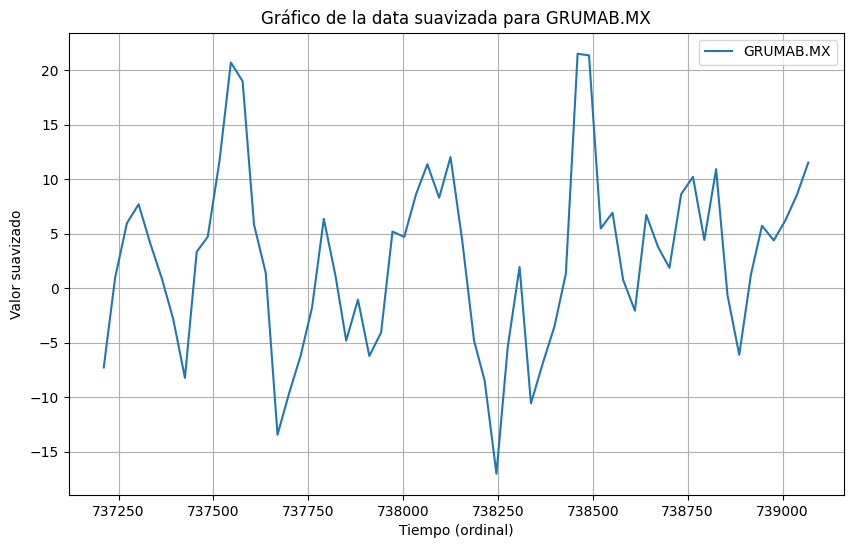

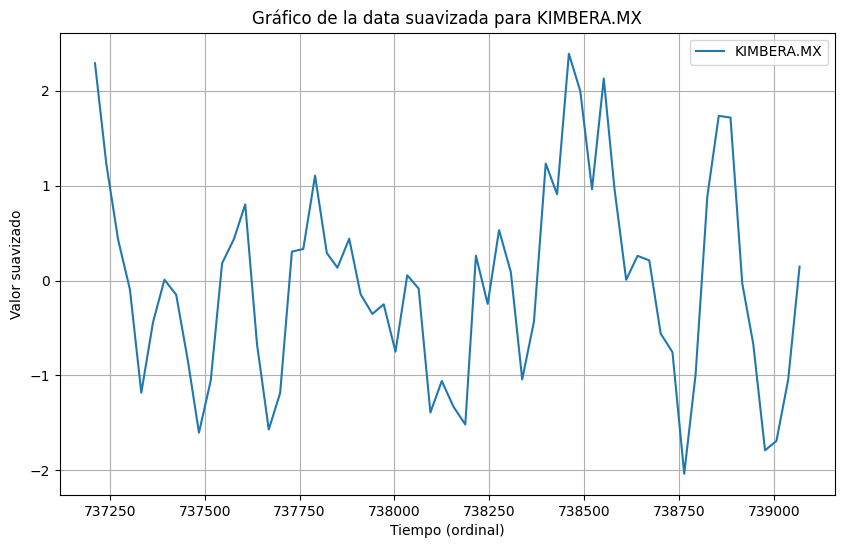

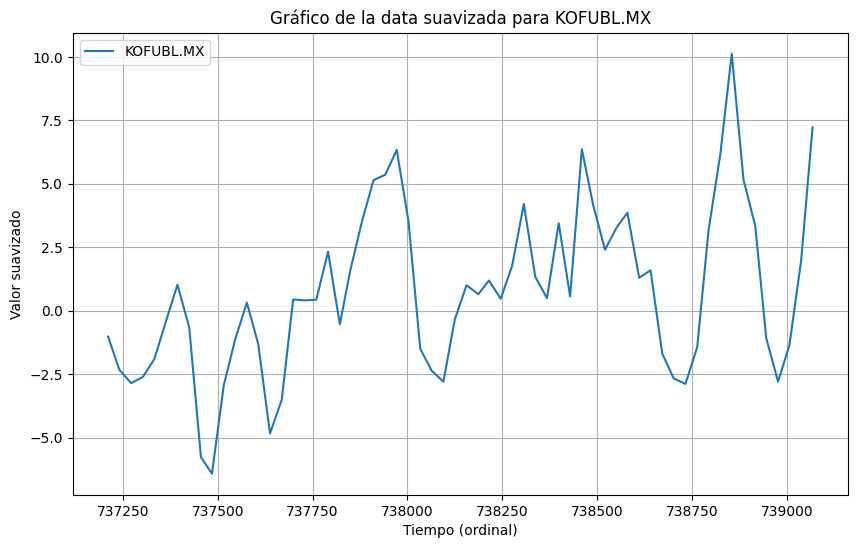

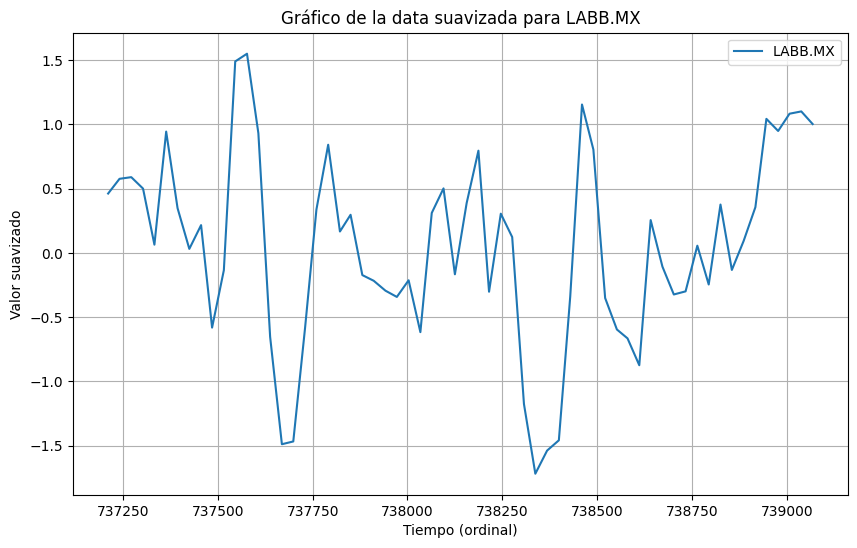

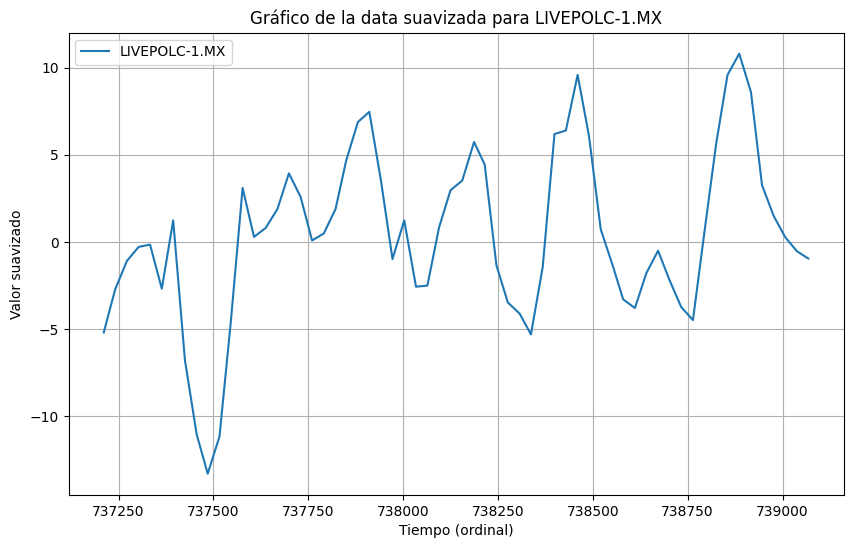

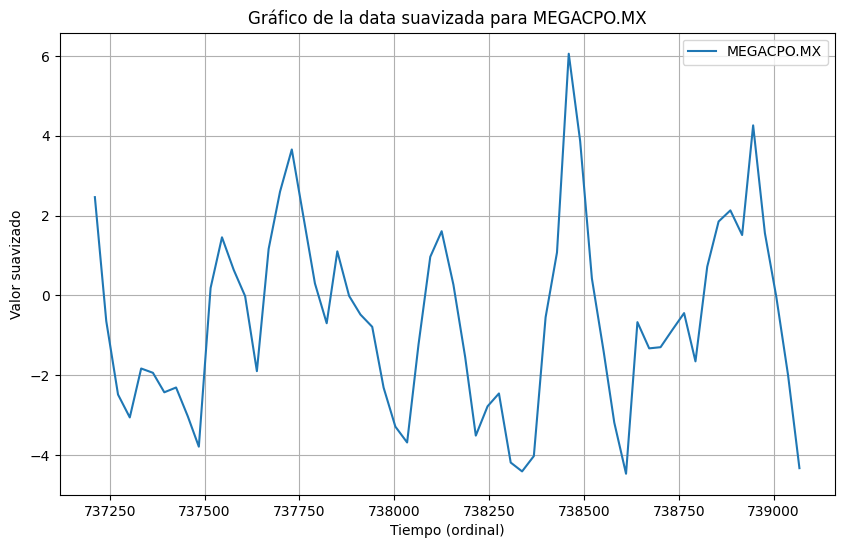

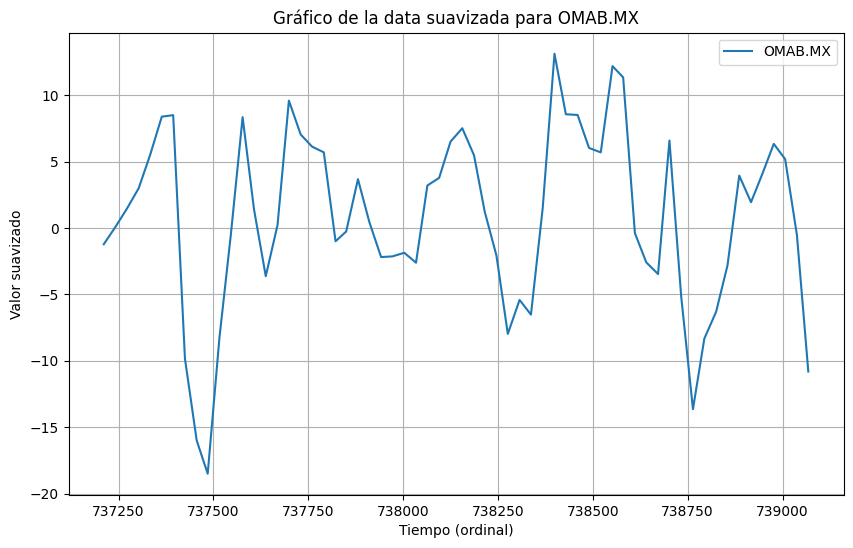

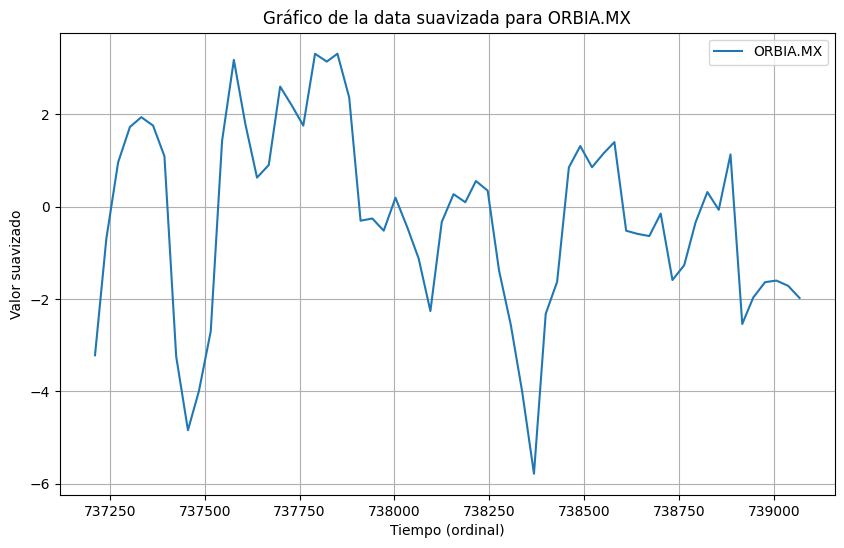

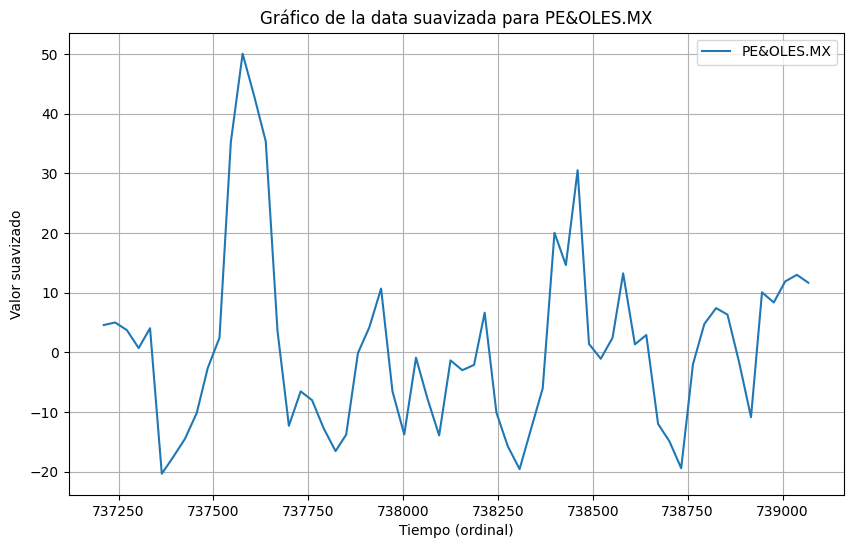

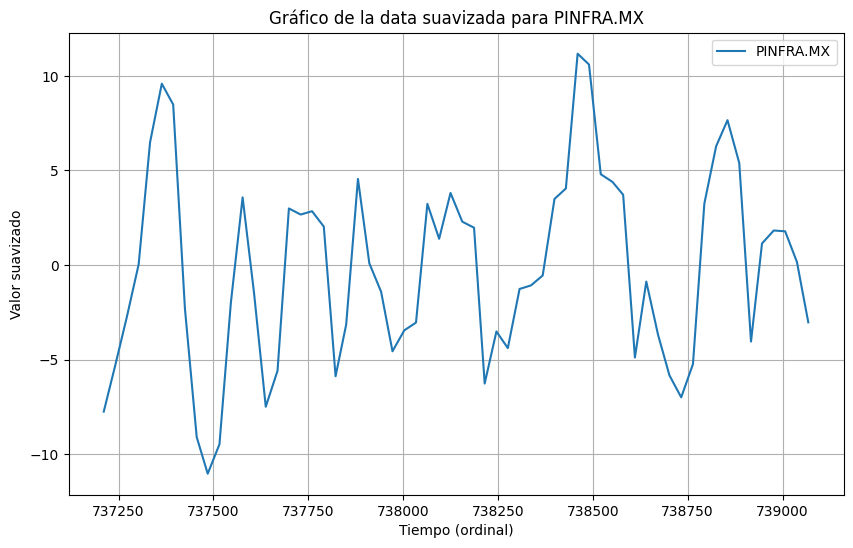

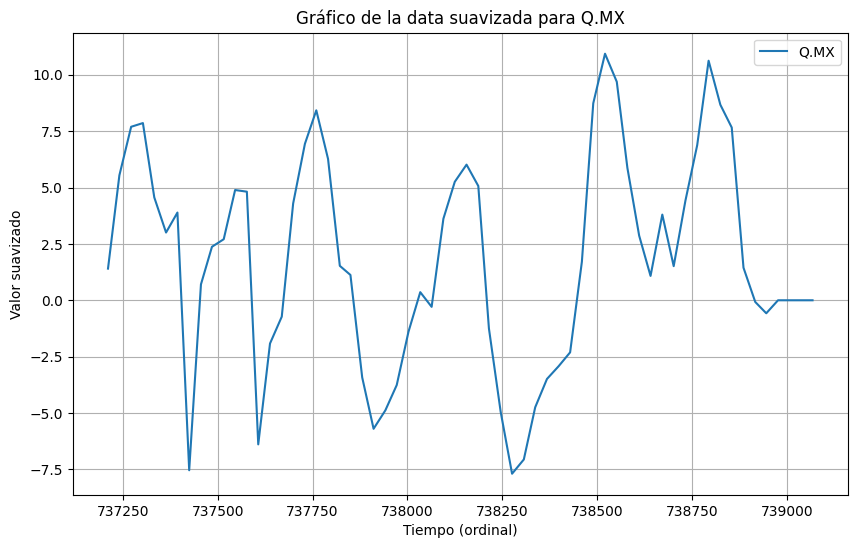

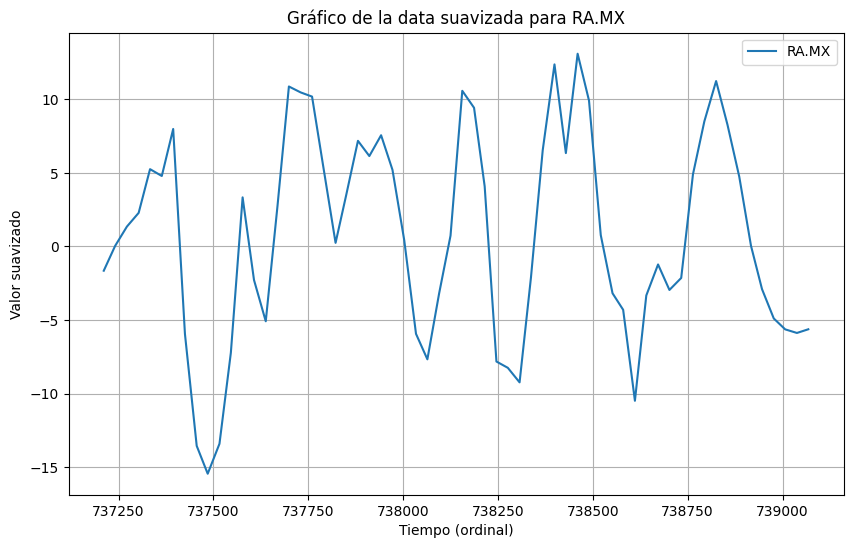

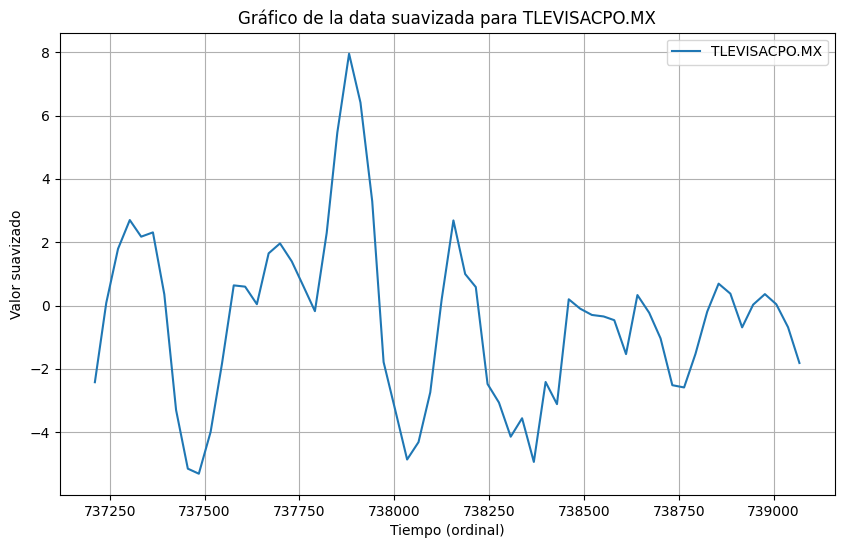

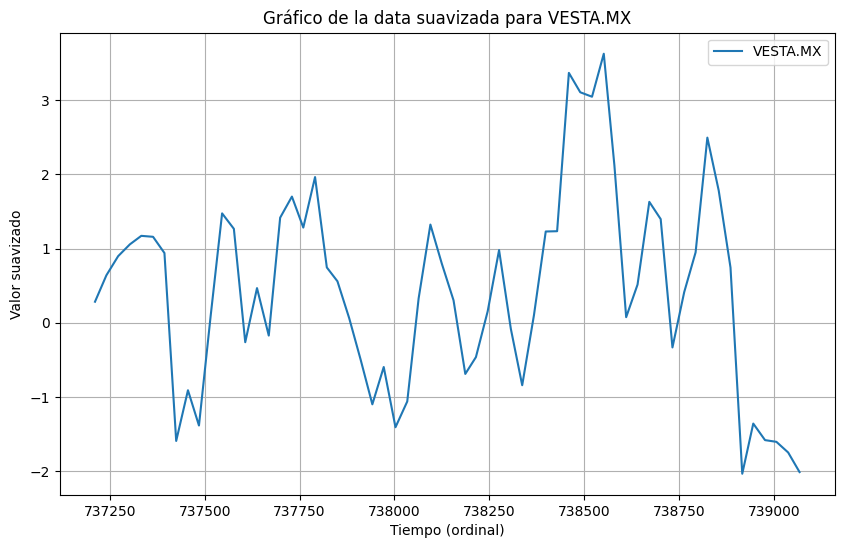

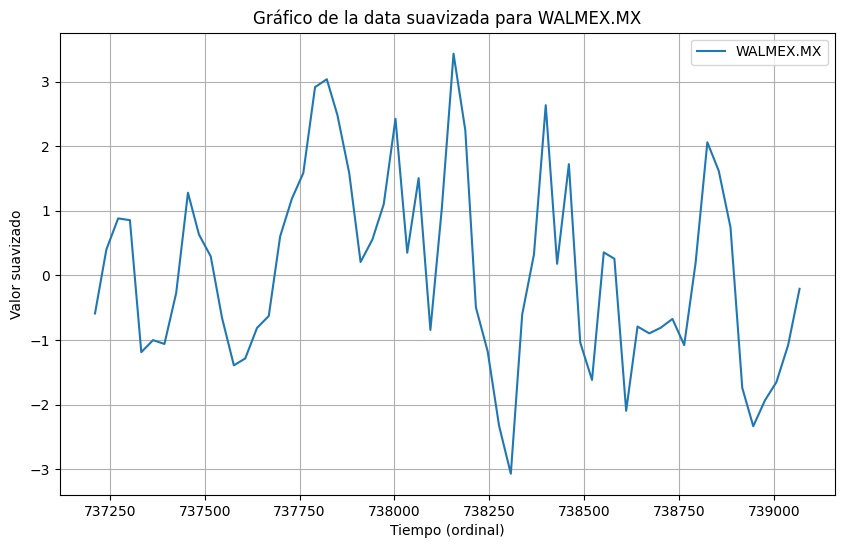

In [37]:
#  grafica data_suavizada

import matplotlib.pyplot as plt

# Graficar la data suavizada
for column in data_suavizada.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data_suavizada.index, data_suavizada[column], label=column)
    plt.xlabel("Tiempo (ordinal)")
    plt.ylabel("Valor suavizado")
    plt.title(f"Gráfico de la data suavizada para {column}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [38]:
data_rex.head()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
737211,-1.245715,0.194025,-1.218810,-0.104206,-7.142375,-0.128571,-0.781904,-1.601667,-0.282143,-1.455478,...,2.461664,-1.221428,-3.217617,4.582621,-7.750479,1.403811,-1.648094,-2.422380,0.284524,-0.588095
737241,0.147143,-0.228393,2.025000,0.152563,-3.826423,-1.347142,-1.107143,0.452142,-0.190714,-1.327143,...,-0.645716,0.050000,-0.687142,5.014288,-5.329285,5.542143,0.040715,0.082143,0.640715,0.402142
737272,0.892858,-0.485497,3.900000,0.319429,0.203576,-1.994285,-1.214285,1.771428,-0.121429,-1.147857,...,-2.486429,1.455714,0.960000,3.729287,-2.733568,7.693571,1.352143,1.789285,0.898572,0.883571
737303,0.991430,-0.577289,4.406191,0.396392,4.947622,-2.070000,-1.103333,2.356190,-0.074286,-0.917619,...,-3.060476,2.995713,1.723809,0.727620,0.036670,7.858094,2.286190,2.699047,1.058095,0.856190
737333,-0.320953,0.017836,3.550952,0.530338,16.270950,-0.961429,0.013810,2.751429,0.062857,0.008095,...,-1.833809,5.485713,1.936190,4.049048,6.483809,4.560952,5.257619,2.173809,1.172382,-1.187619


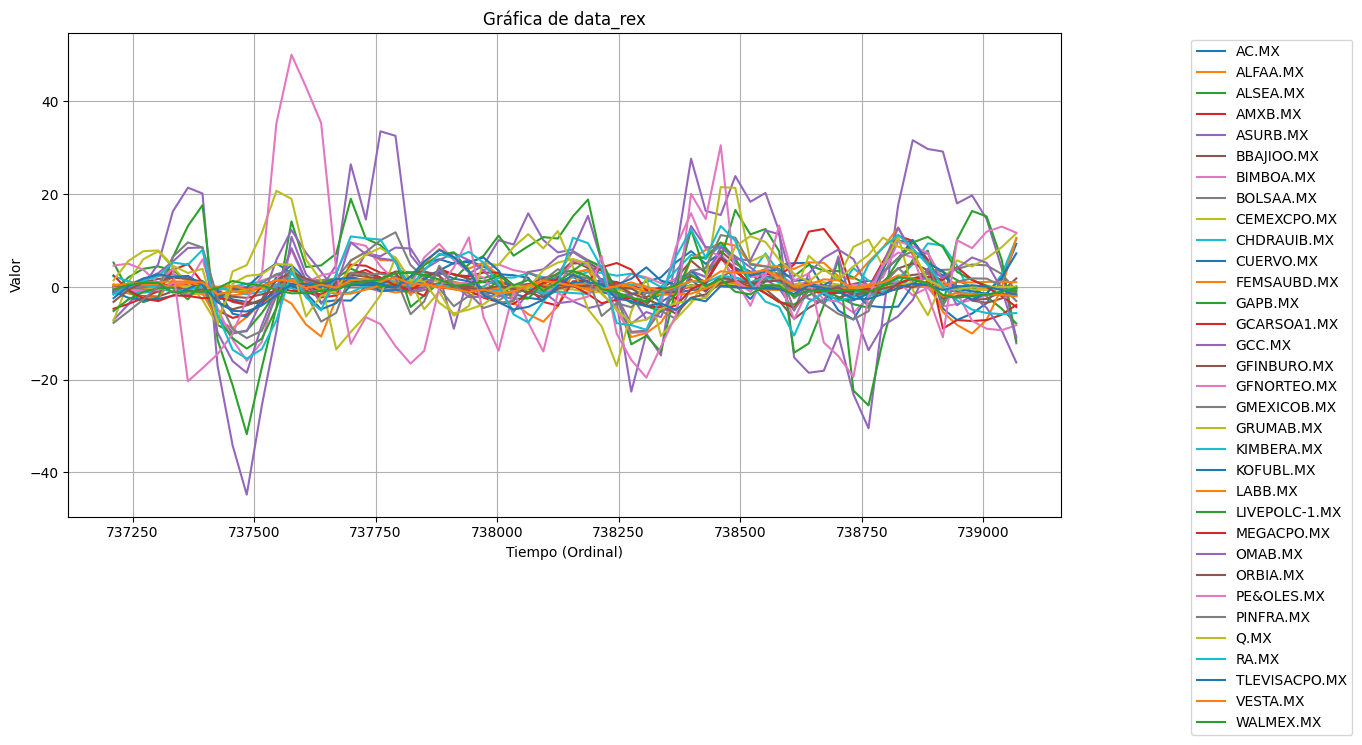

In [39]:
# grafica de data_rex

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pandas as pd

# ... (Your existing code for data processing) ...

# Plotting
plt.figure(figsize=(14, 7))
for column in data_rex.columns:
    plt.plot(data_rex.index, data_rex[column], label=column)

plt.title('Gráfica de data_rex')
plt.xlabel('Tiempo (Ordinal)')
plt.ylabel('Valor')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1)) #Move legend outside plot area
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:

data['Returns'] = data['Close'].pct_change()  # Retornos porcentuales
data['Moving_Avg'] = data['Close'].rolling(window=20).mean()  # Media móvil
data['Volatility'] = data['Close'].rolling(window=20).std()  # Volatilidad
data = data.dropna()  # Eliminar valores nulos

X = data[['Returns', 'Moving_Avg', 'Volatility']]
y = data['Close']

# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Entrenamiento del modelo (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Real')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicción', linestyle='--')
plt.title('Predicción del IPC (Entrenamiento vs Prueba)')
plt.xlabel('Fecha')
plt.ylabel('Índice IPC')
plt.legend()
plt.show()

KeyError: 'Close'

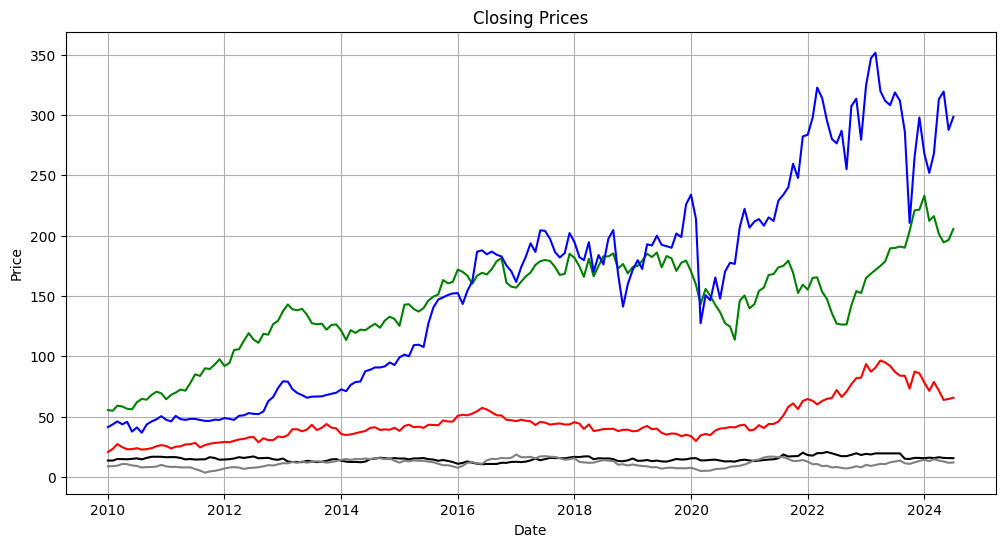

In [40]:
# grafica 5 acciones random

import matplotlib.pyplot as plt

# plot the closing price of 5 random
plt.figure(figsize=(12, 6))
plt.plot(data['AMXB.MX'],label='AMXB.MX', color='black')
plt.plot(data['CEMEXCPO.MX'],label='CEMEXCPO.MX', color='gray')
plt.plot(data['BIMBOA.MX'],label='BIMBOA.MX', color='red')
plt.plot(data['FEMSAUBD.MX'],label='FEMSAUBD.MX', color='green')
plt.plot(data['GAPB.MX'],label='GAPB.MX', color='blue')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [42]:
# Crear un índice de fechas para los próximos 12 meses
horizon = 12  # Número de meses a pronosticar
last_date = portafolio.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=horizon, freq='MS')


## **Modelo Simple NAIVE**

In [43]:
# Modelo Naive
naive_last_value = portafolio.iloc[-1]
naive_forecast = pd.Series([naive_last_value] * horizon, index=future_dates)

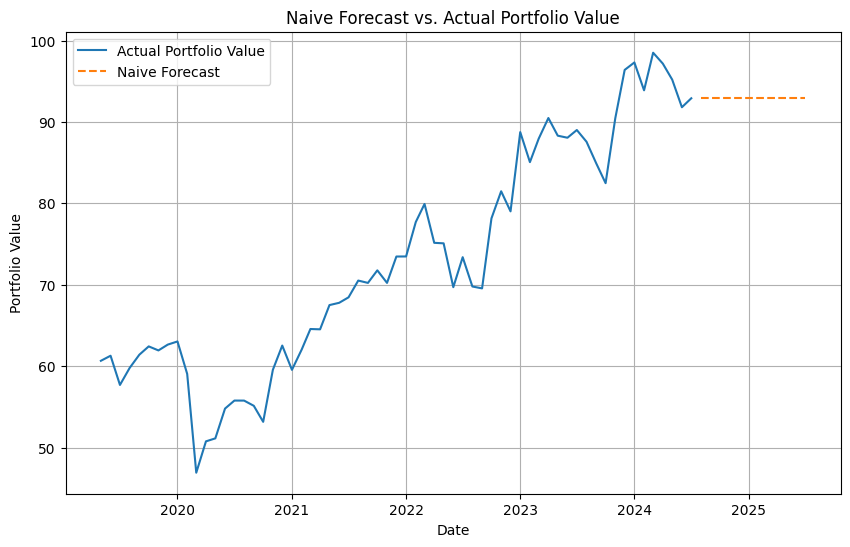

In [44]:
# grafica naive

# Plotting the Naive forecast
plt.figure(figsize=(10, 6))
plt.plot(portafolio.index, portafolio, label='Actual Portfolio Value')
plt.plot(naive_forecast.index, naive_forecast, label='Naive Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Naive Forecast vs. Actual Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

## **Modelo ARIMA**



In [51]:
!pip install pmdarima
from pmdarima import auto_arima # Import the auto_arima function from pmdarima

arima_model = auto_arima(portafolio, seasonal=False, trace=True, suppress_warnings=True, stepwise=True)
arima_forecast = pd.Series(arima_model.predict(n_periods=horizon), index=future_dates)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=337.680, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=338.992, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=338.869, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=336.983, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.685 seconds


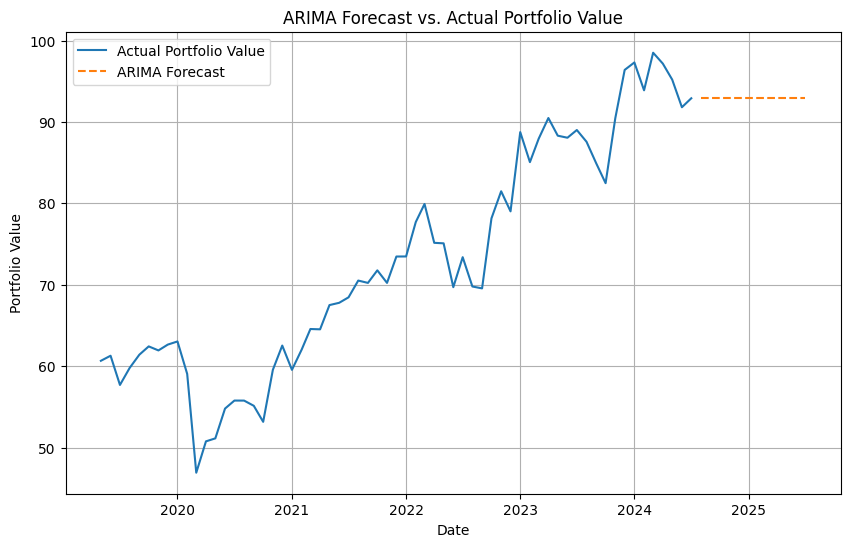

In [52]:
# grafica ARIMA

# Plotting the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(portafolio.index, portafolio, label='Actual Portfolio Value')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('ARIMA Forecast vs. Actual Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

## **Modelo ETS**



In [53]:
!pip install statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Now you can use ExponentialSmoothing
ets_model = ExponentialSmoothing(portafolio, seasonal=None, trend="add", damped_trend=True).fit()
ets_forecast = pd.Series(ets_model.forecast(horizon), index=future_dates)

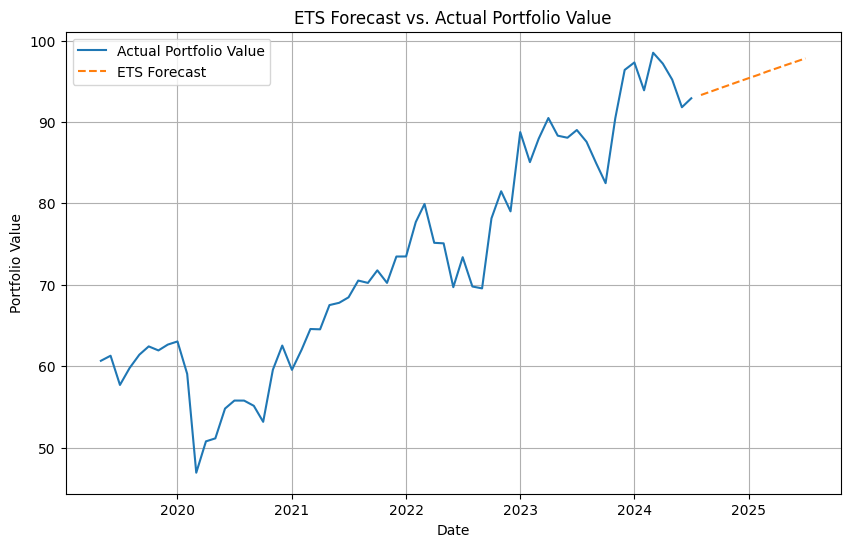

In [54]:
#  grafica ETS

# Plotting the ETS forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(portafolio.index, portafolio, label='Actual Portfolio Value')
plt.plot(ets_forecast.index, ets_forecast, label='ETS Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('ETS Forecast vs. Actual Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Combinar datos históricos y pronósticos
full_naive = pd.concat([portafolio, naive_forecast])
full_arima = pd.concat([portafolio, arima_forecast])
full_ets = pd.concat([portafolio, ets_forecast])

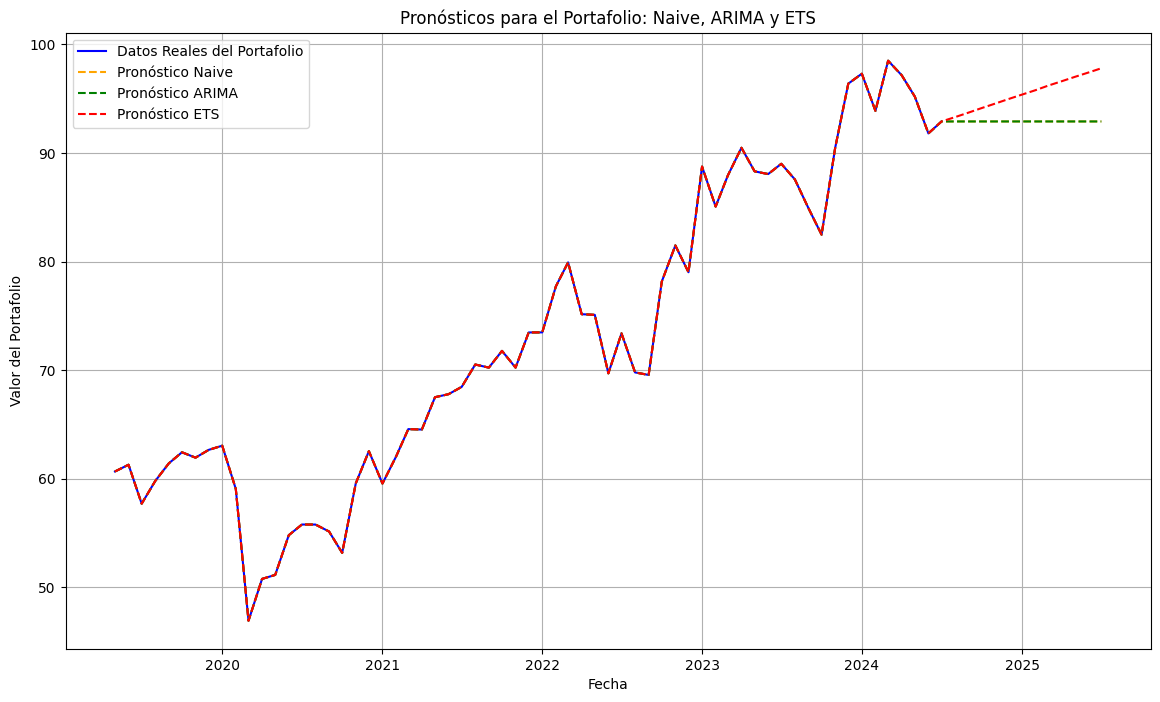

In [56]:
# Gráfica de los resultados
plt.figure(figsize=(14, 8))
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue')
plt.plot(full_naive, label='Pronóstico Naive', linestyle='--', color='orange')
plt.plot(full_arima, label='Pronóstico ARIMA', linestyle='--', color='green')
plt.plot(full_ets, label='Pronóstico ETS', linestyle='--', color='red')
plt.title("Pronósticos para el Portafolio: Naive, ARIMA y ETS")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()

In [57]:
# Evaluación del modelo Naive (Error absoluto medio en datos históricos)
naive_historical_forecast = portafolio.shift(1)
naive_mae = (portafolio - naive_historical_forecast).abs().mean()

print(f"Error Absoluto Medio (MAE) del modelo Naive en datos históricos: {naive_mae:.2f}")
print(f"Modelo ARIMA: {arima_model.summary()}")

Error Absoluto Medio (MAE) del modelo Naive en datos históricos: 2.68
Modelo ARIMA:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -167.491
Date:                Tue, 03 Dec 2024   AIC                            336.983
Time:                        00:17:58   BIC                            339.110
Sample:                    05-01-2019   HQIC                           337.818
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        13.0019      1.751      7.425      0.000       9.570      16.434
Ljung-Box (L1) (Q):                   0.73   Ja

## **Regresión Dinámica**

In [62]:
# Generar la variable dependiente (serie de precios) y regresores (series pasadas)
def prepare_data_for_regression(data, lag=1):
    # Diferenciamos la serie para hacerla estacionaria
    data_diff = data.diff().dropna()

    # Crear regresores con lags (t=lag, t=lag-1, etc.)
    X = pd.DataFrame()
    for i in range(1, lag + 1):
        X[f"lag_{i}"] = data_diff.shift(i)

    # Variable dependiente (la serie diferenciada)
    y = data_diff[lag:]

    return X, y

# Ejemplo con AAPL y un lag de 1
X, y = prepare_data_for_regression(data_clean['CEMEXCPO.MX'], lag=1)

X.head(), y.head()

(        lag_1
 Date         
 737211    NaN
 737241   0.10
 737272  -1.28
 737303   0.66
 737333   0.22,
 Date
 737241   -1.28
 737272    0.66
 737303    0.22
 737333   -0.46
 737364   -0.08
 Name: CEMEXCPO.MX, dtype: float64)

In [65]:
import statsmodels.api as sm

# Agregar una constante para el modelo de regresión
X_train = sm.add_constant(X_train)

# Ajustar el modelo de regresión dinámica
dynamic_model = sm.OLS(y_train, X_train).fit()

# Resumen del modelo
print(dynamic_model.summary())

# Predicción para el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegurarse de incluir la constante en los datos de prueba
y_pred_dynamic = dynamic_model.predict(X_test)

# Validación del modelo con métricas de error
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_dynamic = mean_squared_error(y_test, y_pred_dynamic)
mae_dynamic = mean_absolute_error(y_test, y_pred_dynamic)

print(f"MSE Dynamic Regression: {mse_dynamic}")
print(f"MAE Dynamic Regression: {mae_dynamic}")

NameError: name 'X_train' is not defined

Epoch 100/1000, MSE: 0.0141
Epoch 200/1000, MSE: 0.0085
Epoch 300/1000, MSE: 0.0084
Epoch 400/1000, MSE: 0.0084
Epoch 500/1000, MSE: 0.0084
Epoch 600/1000, MSE: 0.0083
Epoch 700/1000, MSE: 0.0083
Epoch 800/1000, MSE: 0.0083
Epoch 900/1000, MSE: 0.0082
Epoch 1000/1000, MSE: 0.0082
MSE Neural Network Autoregression: 0.0099
MAE Neural Network Autoregression: 0.0758


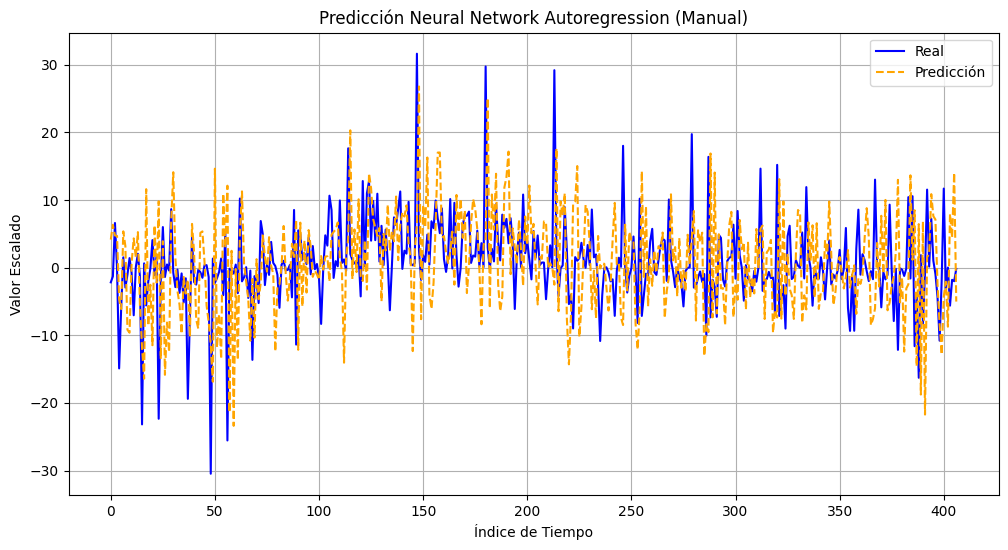

In [69]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Preparación de los datos
n_lags = 12  # Número de rezagos
scaler = MinMaxScaler()

# Escalar los datos
scaled_data = scaler.fit_transform(data_rex.values.reshape(-1, 1))

# Crear secuencias para el modelo NAR
X = []
y_target = []
for i in range(n_lags, len(scaled_data)):
    X.append(scaled_data[i - n_lags:i, 0])
    y_target.append(scaled_data[i, 0])

X = np.array(X)
y_target = np.array(y_target)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42, shuffle=False)

# Inicializar pesos y bias manualmente
np.random.seed(42)
weights = np.random.rand(n_lags)
bias = np.random.rand(1)

# Definir función de activación (ReLU)
def relu(x):
    return np.maximum(0, x)

# Entrenamiento manual de una red neuronal simple
epochs = 1000
learning_rate = 0.01

for epoch in range(epochs):
    # Forward pass
    linear_output = np.dot(X_train, weights) + bias
    predictions = relu(linear_output)

    # Cálculo del error
    errors = predictions - y_train

    # Backward pass: Gradiente descendente
    grad_weights = np.dot(errors, X_train) / len(y_train)
    grad_bias = np.mean(errors)

    # Actualización de pesos y bias
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

    # Registro del error
    if (epoch + 1) % 100 == 0:
        mse = np.mean(errors**2)
        print(f"Epoch {epoch+1}/{epochs}, MSE: {mse:.4f}")

# Evaluación del modelo en el conjunto de prueba
linear_output_test = np.dot(X_test, weights) + bias
y_pred_test = relu(linear_output_test)

mse_nar = mean_squared_error(y_test, y_pred_test)
mae_nar = mean_absolute_error(y_test, y_pred_test)

print(f"MSE Neural Network Autoregression: {mse_nar:.4f}")
print(f"MAE Neural Network Autoregression: {mae_nar:.4f}")

# Inversión del escalado para las predicciones
y_pred_test_rescaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualización de las predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Real', linestyle='-', color='blue')
plt.plot(y_pred_test_rescaled, label='Predicción', linestyle='--', color='orange')
plt.title('Predicción Neural Network Autoregression (Manual)')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Valor Escalado')
plt.legend()
plt.grid()
plt.show()


## **Evaluación del modelo**


In [72]:
!pip install statsforecast


In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsforecast import StatsForecast
from statsforecast.models import Naive, AutoARIMA, AutoETS

# Función para evaluar los modelos
def evaluate_model(y_train, y_test, models, model_name, freq='M'):
    # Ajustar el modelo
    model = StatsForecast(df=y_train, models=models, freq=freq)
    forecast = model.fit()
    predictions = forecast.predict()

    # Evaluar error utilizando MAE y RMSE
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    return mae, rmse

# Dividir datos en entrenamiento y prueba (últimos 3 meses como test)
train_size = int(len(data_diferenciada) * 0.8)
y_train = data_diferenciada[:train_size]
y_test = data_diferenciada[train_size:]

# Evaluación de los modelos
results = {}
models = {
    "Naive": Naive(),
    "ARIMA": AutoARIMA(),
    "ETS": AutoETS()
}

for model_name, model_instance in models.items():
    mae, rmse = evaluate_model(y_train, y_test, [model_instance], model_name)
    results[model_name] = {"MAE": mae, "RMSE": rmse}

# Mostrar resultados
results

TypeError: _StatsForecast.__init__() got an unexpected keyword argument 'df'

In [77]:
# Asignar el mejor modelo para cada acción
best_models = {}
for ticker in tickers:
    best_model = min(results, key=lambda model: results[model]["RMSE"])  # Selección por RMSE
    best_models[ticker] = best_model

best_models

ValueError: min() arg is an empty sequence

In [78]:
# Calcular el valor del portafolio
# Usamos los pesos previamente calculados (weights) y los precios de cierre mensual
portfolio_value = (data_clean * pd.Series(weights)).sum(axis=1)

portfolio_value.head()

,0
Date,
737180,0.0
737211,0.0
737241,0.0
737272,0.0
737303,0.0


In [79]:
# Pronóstico de 3 meses para cada acción usando el mejor modelo
forecast_3_months = {}
for ticker in tickers:
    best_model_name = best_models[ticker]
    model_instance = models[best_model_name]

    # Ajustamos el modelo con los datos completos (training + test)
    model = StatsForecast(df=data_clean[ticker], models=[model_instance], freq='M')
    forecast = model.fit()
    forecast_3 = forecast.predict(h=3)  # Pronóstico para 3 meses

    forecast_3_months[ticker] = forecast_3

forecast_3_months

KeyError: 'AMXB.MX'

In [80]:
# Pronóstico por sector
sector_forecasts = {}

for sector in set(sector_data.values()):
    sector_stocks = [ticker for ticker, sector_name in sector_data.items() if sector_name == sector]
    sector_forecasts[sector] = []

    for ticker in sector_stocks:
        forecast_3 = forecast_3_months[ticker]
        sector_forecasts[sector].append(forecast_3)

    # Promediar los pronósticos de las acciones dentro de cada sector
    sector_forecasts[sector] = np.mean(sector_forecasts[sector], axis=0)

sector_forecasts

KeyError: 'ALSEA.MX'

In [81]:
# Pronóstico del portafolio
portfolio_forecast = np.sum([forecast_3_months[ticker] * weights[ticker] for ticker in tickers], axis=0)

portfolio_forecast

KeyError: 'AMXB.MX'